<a href="https://colab.research.google.com/github/sayam-h069/aiml_2025/blob/main/Lab09_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Separate features (X) and target labels (y)
X = iris.data  # Features (flower measurements)
y = iris.target  # Labels (species)

# Define feature names and target class for clarity
features = iris.feature_names  # List of feature names (petal length, etc.)
target = 'species'  # Target variable (species of the flower)
class_names = iris.target_names  # List of species (setosa, versicolor, virginica)

# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=5,  # Number of trees in the forest
    max_depth=7,      # Maximum depth of the trees
    random_state=42   # Seed for reproducibility
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=5, random_state=42)

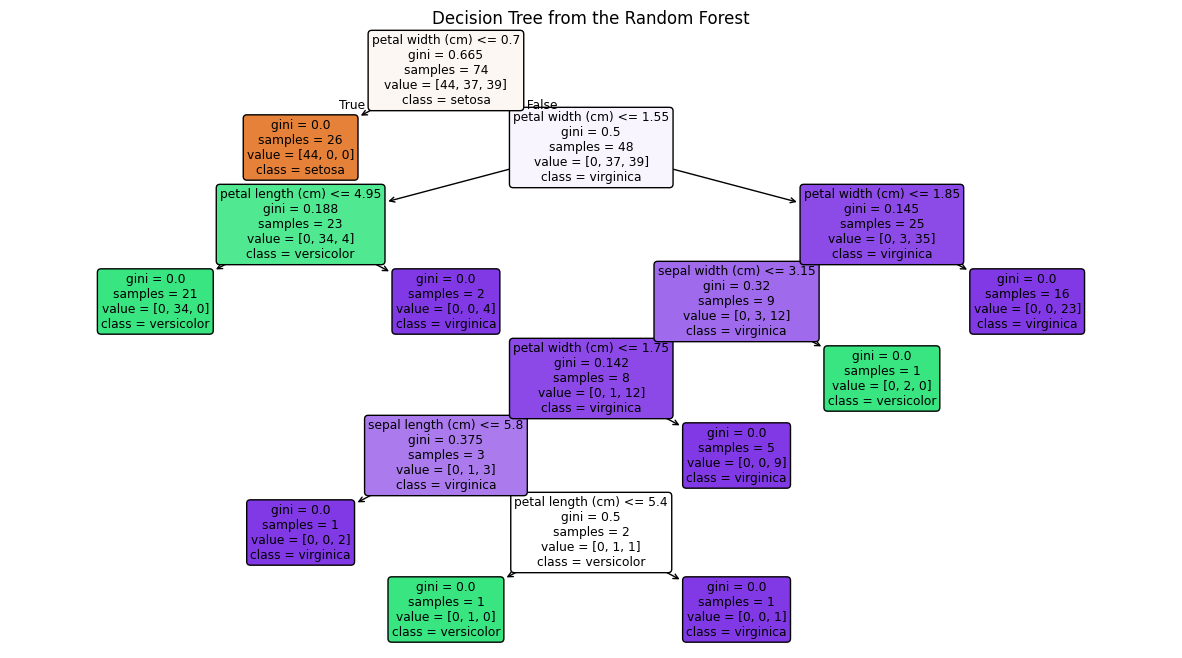

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the tree using the plot_tree function from sklearn
tree = rf_classifier.estimators_[0]
plt.figure(figsize=(15,8))  # Set figure size to make the tree more readable
plot_tree(tree,
          feature_names=features,  # Use the feature names from the dataset
          class_names=class_names,  # Use class names (species names)
          filled=True,              # Fill nodes with colors for better visualization
          rounded=True)             # Rounded edges for nodes
plt.title("Decision Tree from the Random Forest")
plt.show()

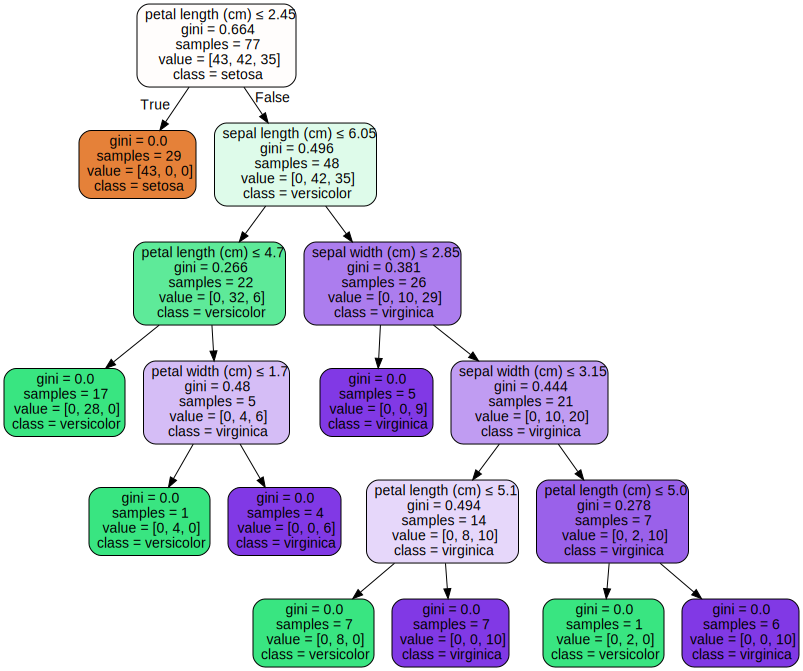

In [4]:
from sklearn.tree import export_graphviz
import graphviz

# Assuming rf_classifier is already trained
# Select one tree from the random forest (e.g., the first one)
tree = rf_classifier.estimators_[3]

# Export the selected tree to DOT format
dot_file_path = "random_forest_tree.dot"
export_graphviz(
    tree,
    out_file=dot_file_path,
    feature_names=features,  # Feature names from the Iris dataset
    class_names=class_names,  # Class names (setosa, versicolor, virginica)
    filled=True,  # Color the nodes
    rounded=True,  # Rounded corners for nodes
    special_characters=True  # Allows special characters in labels
)

with open(dot_file_path) as f:
    dot_graph = f.read()

# Visualize the tree using graphviz
graph = graphviz.Source(dot_graph)
graph.render("random_forest_tree")
graph  # Display the tree graph

In [5]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.9 MB/s eta 0:00:00


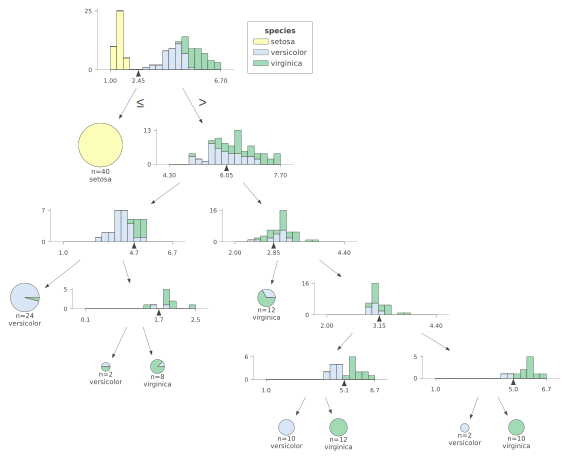

In [6]:
from dtreeviz import model
tree = rf_classifier.estimators_[3]

viz_model = model(
    tree,
    X_train=X_train,
    y_train=y_train,
    target_name=target,
    class_names=list(class_names),
    tree_index=4
)

viz_model.view()

In [7]:
!pip install supertree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00
  Created wheel for supertree: filename=supertree-0.5.4-py3-none-any.whl size=223891 sha256=bf8fb8eefb24d76d12388a06b237243d7ad50c34e4516a7012a24ee79af03ce1
  Stored in directory: /root/.cache/pip/wheels/a6/98/10/c6915a75bfc5834af0d75915eed59d90ddf9fdff8f10c97a90
Successfully built supertree


In [8]:
from supertree import SuperTree

st = SuperTree(
    rf_classifier,
    X_train,
    y_train,
    iris.feature_names,
    iris.target_names
)

st.show_tree(which_tree=0)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

# Load the diabetes dataset
diabetes = load_diabetes()

# Separate features (X) and target (y)
X = diabetes.data  # Features (e.g., age, BMI, etc.)
y = diabetes.target  # Target (a continuous value, which is a measure of disease progression)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=412)

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(
    n_estimators=50,  # Number of trees in the forest
    max_depth=5,      # Maximum depth of the trees
    random_state=142   # Seed for reproducibility
)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=142)

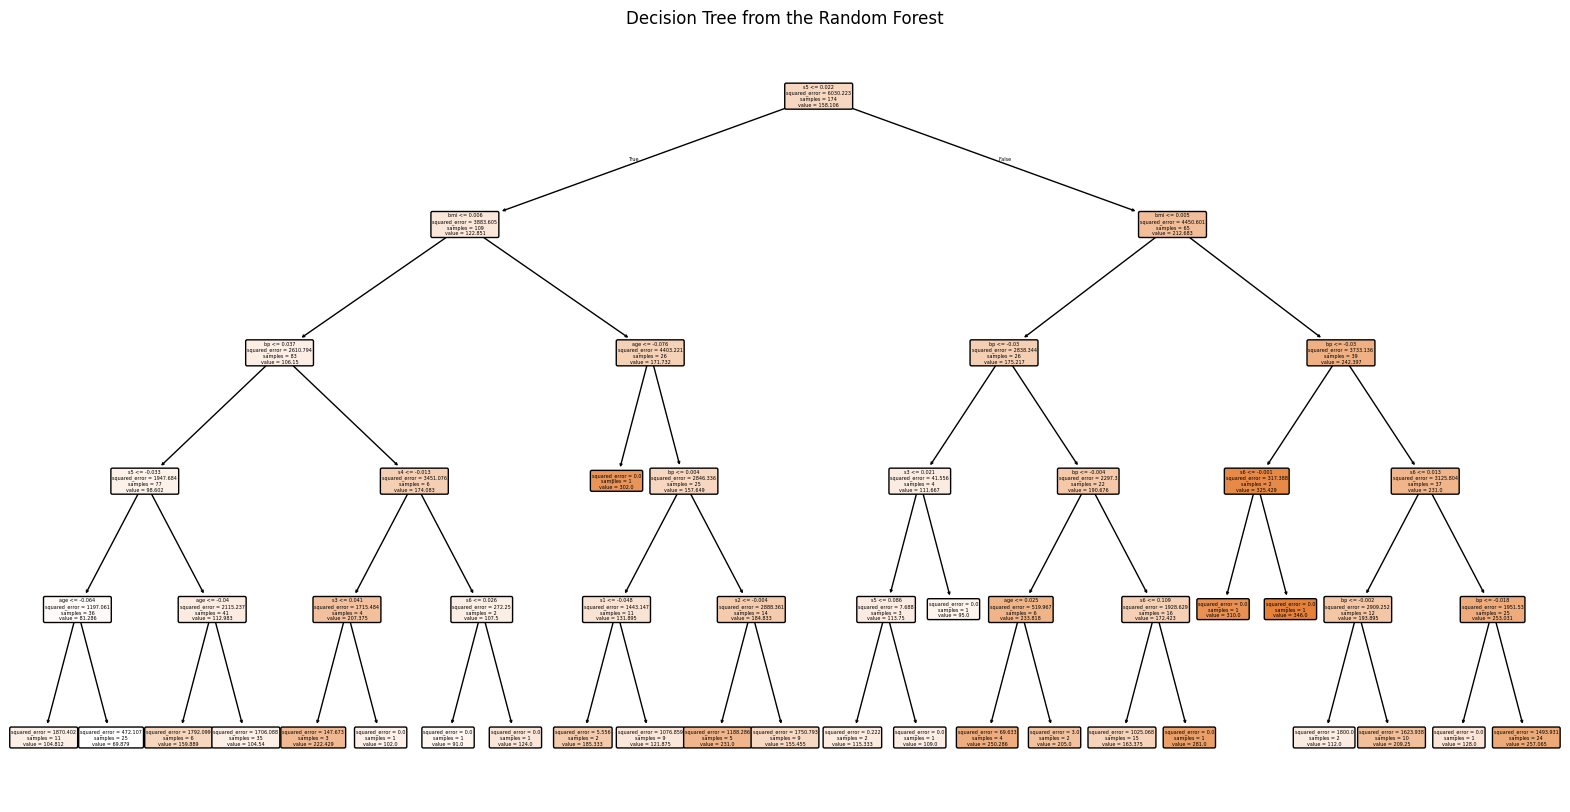

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming rf_regressor is a trained RandomForestRegressor
tree = rf_regressor.estimators_[0]

# Load the diabetes dataset
diabetes = load_diabetes()

# Set figure size
plt.figure(figsize=(20, 10))

# Plot the tree
plot_tree(tree,
          feature_names=diabetes.feature_names,  # Use the feature names from the dataset
          filled=True,              # Fill nodes with colors for better visualization
          rounded=True)             # Rounded edges for nodes

# Add a title
plt.title("Decision Tree from the Random Forest")
plt.show()

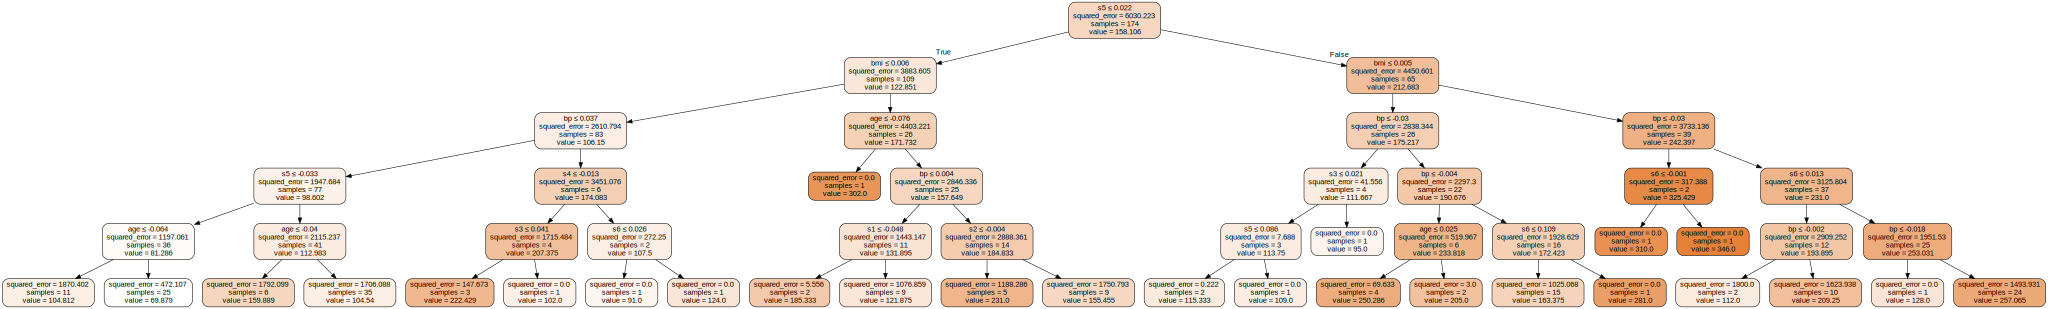

In [11]:
tree = rf_regressor.estimators_[0]

# Define feature names (the diabetes dataset does not provide feature names directly)
features = diabetes.feature_names
# Export the selected tree to DOT format
dot_file_path = "diabetes_forest_tree.dot"
export_graphviz(
    tree,
    out_file=dot_file_path,
    feature_names=features,  # Feature names from the diabetes dataset
    filled=True,  # Color the nodes
    rounded=True,  # Rounded corners for nodes
    special_characters=True  # Allows special characters in labels
)

# Read the DOT file and visualize the tree using Graphviz
with open(dot_file_path) as f:
    dot_graph = f.read()

# Visualize the tree using graphviz
graph = graphviz.Source(dot_graph)
graph.render("diabetes_forest_tree")  # Save the tree visualization as a file
graph

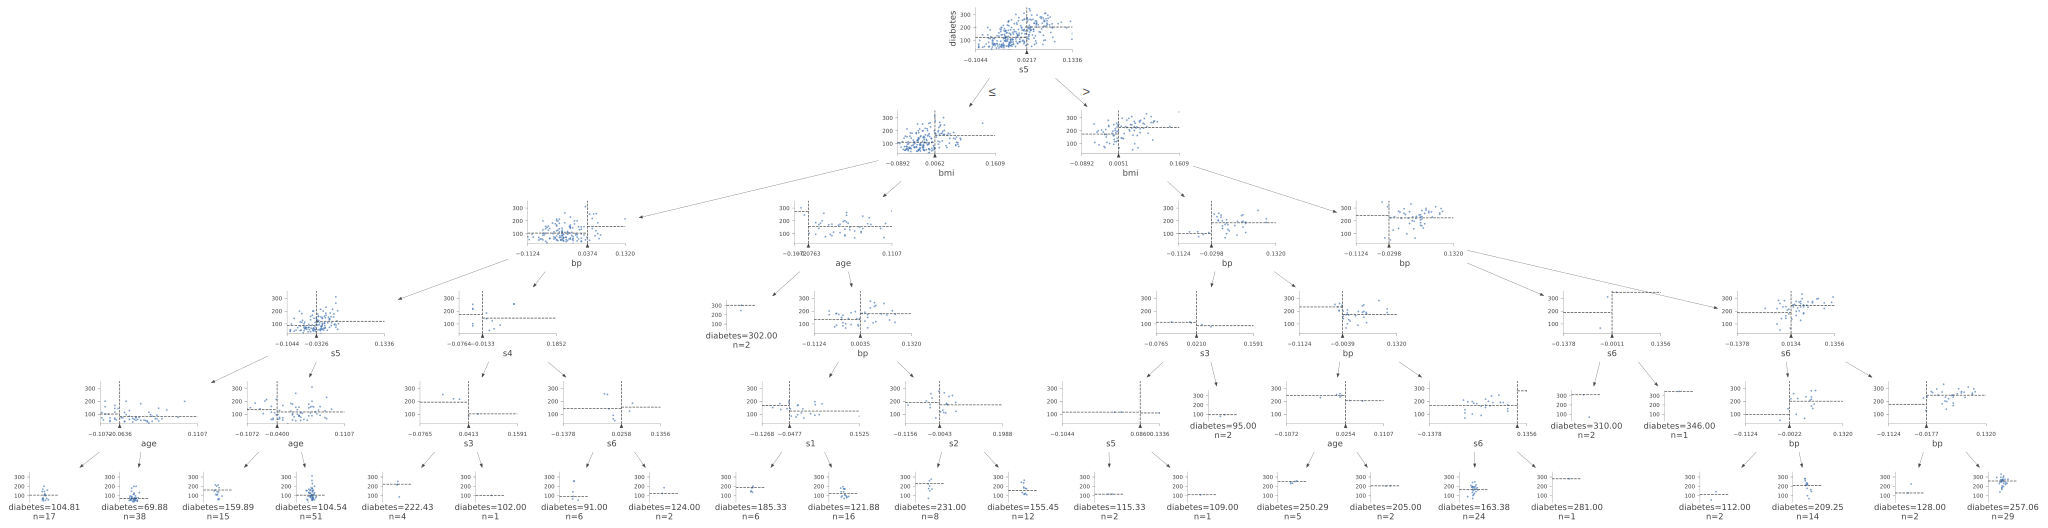

In [12]:
from dtreeviz import model
tree = rf_regressor.estimators_[0]

viz_model = model(
    tree,
    X_train=X_train,
    y_train=y_train,
    feature_names=diabetes.feature_names,
    target_name="diabetes",
)

viz_model.view()

In [13]:
from supertree import SuperTree

st = SuperTree(
    rf_regressor,
    X_train,
    y_train,
    diabetes.feature_names,
    "diabetes"
)

st.show_tree(which_tree=0)